In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

!Pip install statsmodels.tsa.arima.model.ARIMA

from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

import warnings
# Setup
warnings.filterwarnings("ignore")

ERROR: Could not find a version that satisfies the requirement statsmodels.tsa.arima.model.ARIMA (from versions: none)
ERROR: No matching distribution found for statsmodels.tsa.arima.model.ARIMA


In [23]:
import statsmodels.tsa.arima.model.ARIMA as ARMA

ModuleNotFoundError: No module named 'statsmodels.tsa.arima.model.ARIMA'; 'statsmodels.tsa.arima.model' is not a package

In [4]:
!pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00


In [5]:
import pandas_datareader as pdr
btc = pdr.get_data_yahoo(['BTC-USD'])
btc

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-11-23,8038.770020,8038.770020,8267.400391,8038.770020,8232.379883,4225179904
2017-11-24,8253.690430,8253.690430,8374.160156,7940.930176,8074.020020,5058610176
2017-11-25,8790.919922,8790.919922,8790.919922,8191.149902,8241.709961,4342060032
2017-11-26,9330.549805,9330.549805,9522.929688,8775.589844,8789.040039,5475579904
2017-11-27,9818.349609,9818.349609,9818.349609,9352.719727,9352.719727,5653320192
...,...,...,...,...,...,...
2022-11-18,16697.777344,16697.777344,16947.058594,16564.611328,16687.912109,26862218609
2022-11-19,16711.546875,16711.546875,16797.876953,16570.410156,16696.220703,16106223492


In [ ]:
# get the data (from Yahoo Finance, BTC-USD). We are interested in all available data, Close price, daily
#btc = data.DataReader("BTC-USD",data_source='yahoo')
#btc

<AxesSubplot:title={'center':'Bitcoin Adj. Closing Price'}, xlabel='Date'>

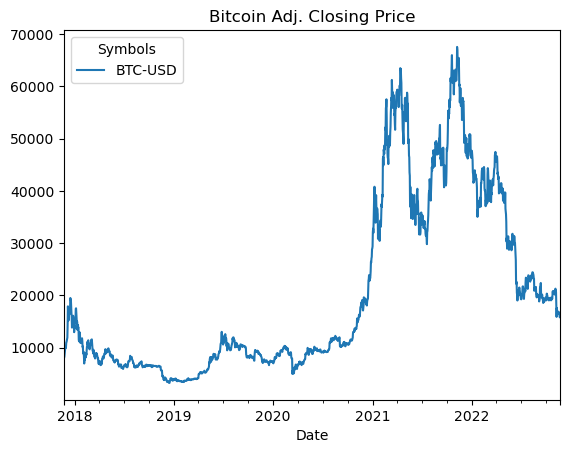

In [6]:
btc_p=btc['Adj Close']
btc_p.plot(title='Bitcoin Adj. Closing Price')

In [7]:
#stationarity

# analyze the time series. 
# stationary? adfuller test

# H0: userAcceleration.x is not stationary
result = adfuller(btc_p)
print('p-value: %.2f' % result[1])

# p-value > 0.05, we accept H0 and conclude that our time serie is not stationary

p-value: 0.63


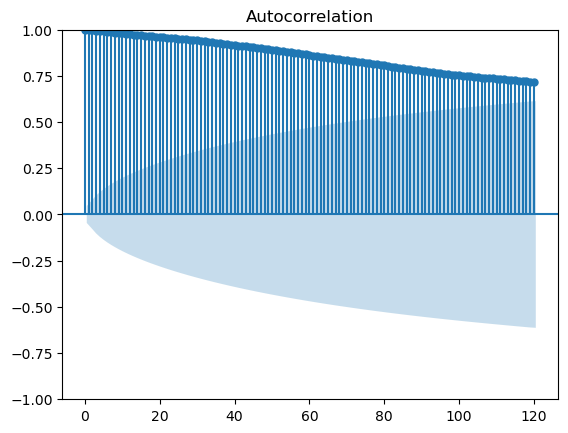

In [8]:
#autocorrelation

# autocorrelation?
# Calculate the ACF 
plot_acf(btc_p,lags=120)
# Show the data as a plot (via matplotlib)
plt.show()

# there is no significant dependency from preivious observations, so we transform the data with other method to see if there will be any autocorrelation detected

<function matplotlib.pyplot.show(close=None, block=None)>

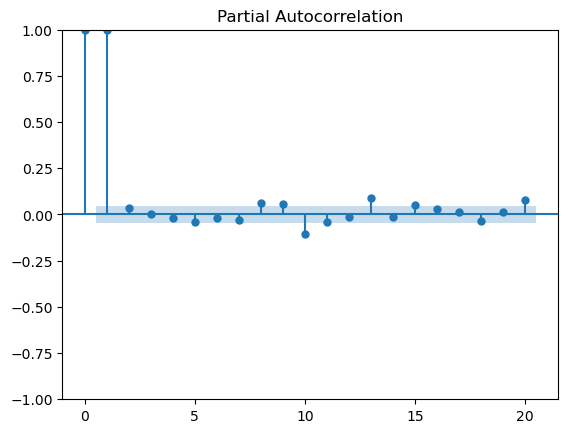

In [9]:
plot_pacf(btc_p,lags=20)
plt.show

In [10]:
#make our data stationary

# we need to transform it to stationary serie
btc['diff'] = btc['Adj Close'].diff()

result = adfuller(btc['diff'].dropna())
print(f'p-value: {result[1]}')
# now p-value < 0.05, we reject H0 and conclude that our time series is stationary

p-value: 1.0206813139198693e-13


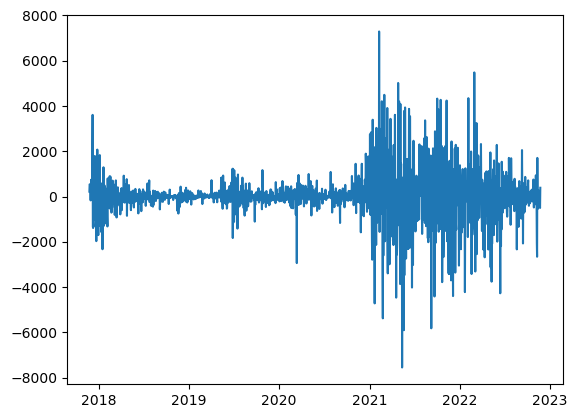

In [11]:
plt.plot(btc['diff'] )

p-value: 0.00


<function matplotlib.pyplot.show(close=None, block=None)>

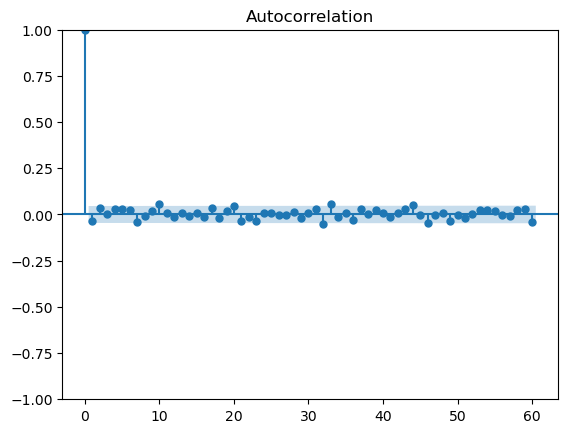

In [12]:
df_log = np.log(btc_p).diff().dropna()

result = adfuller(df_log)
print('p-value: %.2f' % result[1])
plot_acf(df_log,lags=60)
plt.show

# found lags=10 & 33 that the dependecy could be significant, for MA

<function matplotlib.pyplot.show(close=None, block=None)>

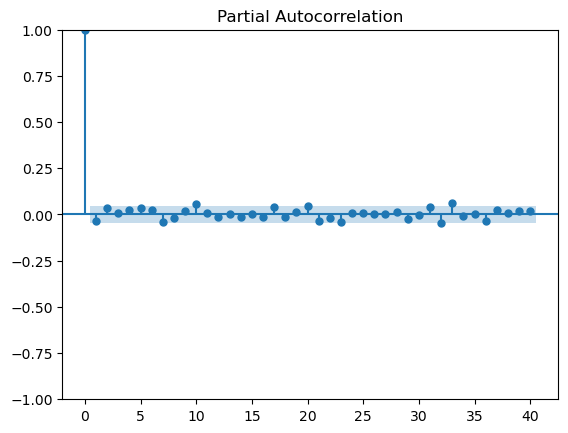

In [13]:
plot_pacf(df_log,lags=40)
plt.show
# found also lags=10 & 33 that the dependecy could be significant, for AR

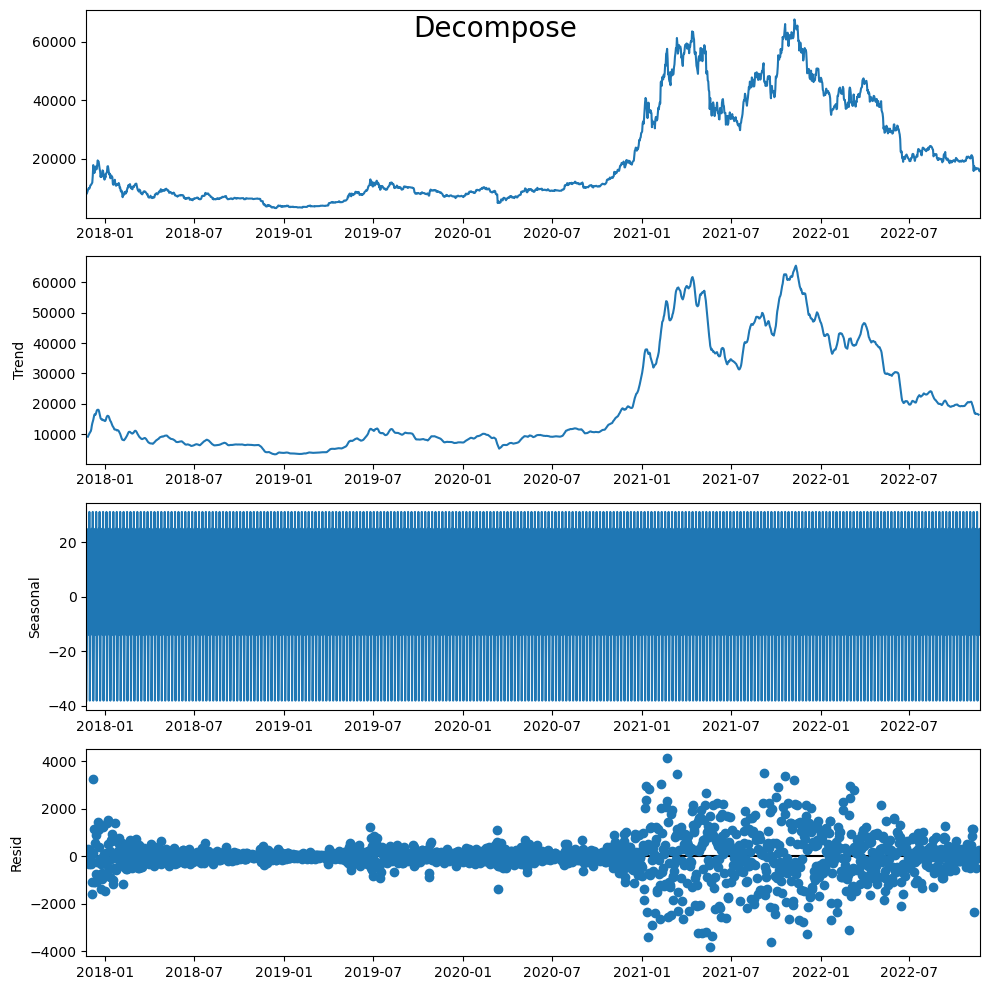

In [14]:
#check the decomposition and seasonality

result_mul = seasonal_decompose(btc_p)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Decompose', fontsize=20)

plt.show()


In [15]:
#split into train and test

split_index = round(len(btc_p)*0.7)
train = btc_p[:split_index]
test = btc_p[split_index:]
#split index = 1278

In [18]:
#ARMA

# build the model AR & MA base on train data
df_log_shift = train - train.shift()
df_log_shift.dropna(inplace=True)

model = ARMA(train, order=(10,10))
results = model.fit()

print(results.summary())

#AIC = 18711.680 for arma at order (10,10)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [24]:
#train model

arima312 = ARIMA(btc_p, order=(3,1,2))
arima312_fit = arima312.fit()
print(arima312_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 1826
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -15226.321
Date:                Tue, 22 Nov 2022   AIC                          30464.642
Time:                        18:12:24   BIC                          30497.698
Sample:                    11-23-2017   HQIC                         30476.836
                         - 11-22-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8238      0.022     38.037      0.000       0.781       0.866
ar.L2         -0.9484      0.018    -53.571      0.000      -0.983      -0.914
ar.L3          0.0041      0.017      0.242      0.8

In [25]:
#prediction

test.loc['2022-02-06 00:00:00', 'BTC-USD']

42412.43359375

In [26]:
def predictions_5(predictions):
    result=[test.loc['2022-02-06 00:00:00', 'BTC-USD']]
    for i in range(1,6):
        result.append(result[-1]+predictions[i])
    return result

In [27]:
pred_date = pd.date_range("2022-02-06", periods=6, freq="D")
pred_date

DatetimeIndex(['2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11'],
              dtype='datetime64[ns]', freq='D')

In [28]:
pred = arima312_fit.predict(start='2022-02-06 00:00:00', end='2022-02-11 00:00:00')
pred

2022-02-06    41193.319315
2022-02-07    42471.283818
2022-02-08    44095.912836
2022-02-09    44286.965150
2022-02-10    44239.800917
2022-02-11    43343.453983
Freq: D, Name: predicted_mean, dtype: float64

In [29]:
result = pd.DataFrame(pred)
result

,predicted_mean
2022-02-06,41193.319315
2022-02-07,42471.283818
2022-02-08,44095.912836
2022-02-09,44286.965150
2022-02-10,44239.800917
2022-02-11,43343.453983
